## Load the `python` packages

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.datasets import load_iris

%matplotlib inline

# handy helper for displaying stuff
from IPython.display import Image

## Load the dataset

In [2]:
iris = load_iris()

### Convert the dataset into a pandas dataframe:

In [3]:
# convert the dataset into a pandas dataframe (just a matter of taste!)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#### Change the names of the columns (features):

In [4]:
iris_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df.columns = iris_features

#### Add a column of the target classes to the dataframe:

In [5]:
iris_df["target"] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Add a column for the target classes that contains the names of the species:

In [6]:
iris_df['species'] = [iris.target_names[x] for x in iris.target]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Plot pair-wise the features of the dataframe

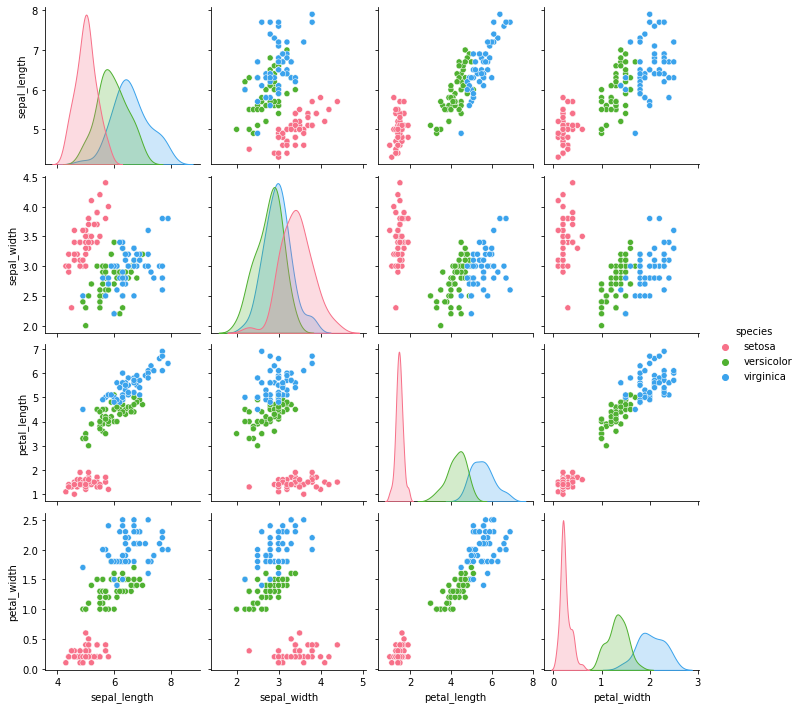

In [7]:
sns.pairplot(iris_df, vars = iris_df.columns[0:4], hue='species', palette='husl')

### See the correlations between features and targets

<AxesSubplot:>

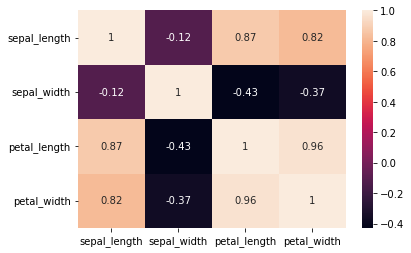

In [8]:
sns.heatmap(iris_df[iris_features].corr(), annot=True)

# 1. Decision Trees Models

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### A simple model: only sepal_length over petal_width

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
which_features = ['sepal_length', 'sepal_width']
X = iris_df[which_features].values # take two features from the dataframe 

In [11]:
Y = iris_df.target.values

In [12]:
max_tree_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_tree_depth)

In [13]:
#tree_clf = clf.fit(iris.data, iris.target)
tree_clf = tree_clf.fit(X, Y)

In [14]:
tree_clf.predict([[2.4, 5.4]])

array([0])

# 2. Visualize the trained Decision Tree

### First way: using `sklearn.tree.plot_tree`

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


In [15]:
from sklearn.tree import plot_tree

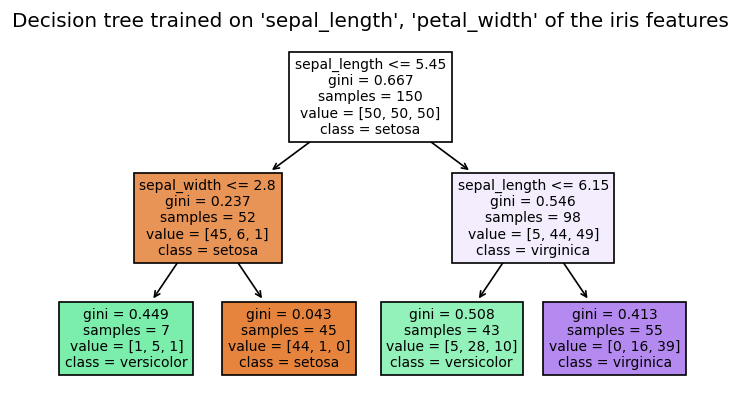

In [16]:
fig_plottree, axes_plottree = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=120)
plot_tree(tree_clf, 
          #feature_names=iris.feature_names[2:], 
          feature_names=which_features, 
          class_names=iris.target_names, 
          filled=True)
axes_plottree.set_title("Decision tree trained on 'sepal_length', 'petal_width' of the iris features")
fig_plottree.savefig('iris_tree.png')

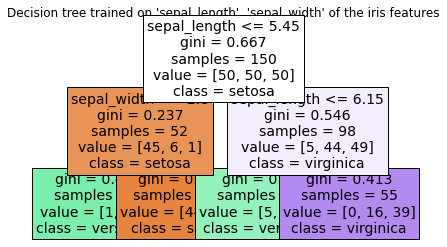

In [17]:
# another, simpler way:
plt.figure()
plot_tree(tree_clf, 
          #feature_names=iris.feature_names[2:], 
          feature_names=which_features, 
          class_names=iris.target_names, 
          filled=True, 
          fontsize=14
         )
plt.title("Decision tree trained on 'sepal_length', 'sepal_width' of the iris features")
plt.show()

### A text-based diagram:


In [18]:
from sklearn.tree import export_text

In [19]:
#export the decision rules
tree_rules = export_text(tree_clf,
                         feature_names = which_features)

#print the result
print(tree_rules)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



### Second way: using `sklearn.tree.export_graphviz`

* Output a graph definition file called iris_tree.dot

* Convert this .dot file to a variety of formats, such as PDF or PNG

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

1. To be able to install Graphviz on your Mac through this method, you first need to have Anaconda installed
2. Open a terminal
3. Type the command below to install Graphviz:

    `conda install python-graphviz`

4. After that, you should be able to use the dot command below to convert the dot file into a png file:

    `dot -Tpng tree.dot -o tree.png`
    
**CAUTION: It is troubleshooting!!!**

```python
from sklearn.tree import export_graphviz

with open("iris.dot", 'w') as f:
    dot_data = export_graphviz(tree_clf, 
                               out_file=f,
                               feature_names=iris.feature_names[2:],
                               class_names=iris.target_names,
                               filled=True, 
                               rounded=True)
!dot -Tpng iris.dot -o iris.png
rm iris.dot
# usually displays the error: /bin/bash: dot: command not found
```

## Plot the decision surface of decision trees

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py


In [20]:
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
h

0.026969696969696973

In [21]:
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([1, 1, 1, ..., 2, 2, 2])

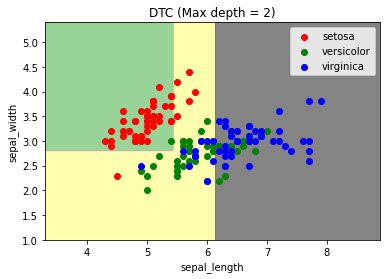

In [22]:
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[Y==i, 0], X[Y==i, 1], color=color, label=target)

plt.xlabel(f'{which_features[0]}')
plt.ylabel(f'{which_features[1]}')
plt.title(f'DTC (Max depth = {max_tree_depth})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

## Estimating Predicted Class Probabilities:

In [23]:
# make a single prediction 
print(tree_clf.predict_proba([[4, 4.5]]))
print(tree_clf.predict([[4, 4.5]]))

[[0.97777778 0.02222222 0.        ]]
[0]


In [24]:
# make a single prediction 
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.14285714 0.71428571 0.14285714]]
[1]


In [25]:
# make a single prediction 
print(tree_clf.predict_proba([[8, 3.5]]))
print(tree_clf.predict([[8, 3.5]]))

[[0.         0.29090909 0.70909091]]
[2]


In [26]:
# make a single prediction 
print(tree_clf.predict_proba([[6.0, 3.0]]))
print(tree_clf.predict([[6.0, 3.0]]))

[[0.11627907 0.65116279 0.23255814]]
[1]


# 3. Evaluating the Decision Trees

Use **`all`** iris features!

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = iris_df[iris_features]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y = iris_df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [88]:
# The data is split into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 5)
# print out the shape of the training and testing sets:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(112, 4)
(112,)
(38, 4)
(38,)


In [89]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
40,5.0,3.5,1.3,0.3
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
69,5.6,2.5,3.9,1.1
17,5.1,3.5,1.4,0.3
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [31]:
max_tree_depth = 3
tree_clf = DecisionTreeClassifier(max_depth=max_tree_depth)

# Fit the model:
tree_clf.fit(X_train, y_train)

# Predict the response:
y_pred = tree_clf.predict(X_test)

### Methods that come together with the DecisionTreeClassifier:

In [32]:
tree_clf.score(X_test, y_test)

0.8947368421052632

In [33]:
tree_clf.score(X_train, y_train)

0.9821428571428571

In [34]:
tree_clf.predict_proba(X, check_input=True)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

## 3.1 Evaluate the DT Classifier: The confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
mat_test = confusion_matrix(y_test, y_pred)
print('confusion matrix = \n', mat_test)

confusion matrix = 
 [[12  0  0]
 [ 0 12  2]
 [ 0  2 10]]


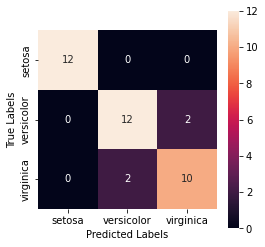

In [37]:
fig_cm, ax_cm = plt.subplots(1, 1, figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
ax_cm = sns.heatmap(cm, annot=True, square=True,
                    xticklabels=iris.target_names,
                    yticklabels=iris.target_names)
ax_cm.set_xlabel('Predicted Labels')
ax_cm.set_ylabel('True Labels');

### Accuracy performance:

* accuracy_score:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

* precision_score:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

* recall_score:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

* f1:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

* classification_report:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

* **Accuracy:**

    `sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix`
    
    $\dfrac{\sum{\mbox{diagonals in the confusion matrix}}}{\sum{\text{all boxes in the confusion matrix}}}$


* **Precision:**

    `True positive (number in diagonal)/All positives (column sum)`
    
    $\dfrac{\text{True positive (number in diagonal)}}{\text{All positives (column sum)}} = \dfrac{TP}{TP + FP}$
    
    
* **Recall:**

    `True positive (number in diagonal)/All assignments (row sum)`
    
    $\dfrac{\text{True positive (number in diagonal)}}{\text{All assignments (row sum)}} = \dfrac{TP}{TP + FN}$
    
* **f1:**

    `2 * (precision * recall)/(precision + recall)`
    
    $2\times \dfrac{(\text{precision} \times \text{recall})}{\text{(precision + recall)}}$

In [39]:
# Evaluate accuracy:
labels = iris_df.species.unique()
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.8947368421052632
[1.         0.85714286 0.83333333]
[1.         0.85714286 0.83333333]


In [40]:
f1 = f1_score(y_test, y_pred, average=None)
f1_results = pd.DataFrame(f1, index=labels)
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
setosa,1.000000
versicolor,0.857143
virginica,0.833333


In [41]:
# All metrics in a single output:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.86      0.86        14
           2       0.83      0.83      0.83        12

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38



# 4. Feature importance

From the documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

*The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini** importance.*

In [42]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 
                           'importance' : np.round(tree_clf.feature_importances_, 3)
                          }
                         )
importance.sort_values('importance', ascending=False, inplace = True)
importance

,feature,importance
2,petal_length,0.532
3,petal_width,0.444
0,sepal_length,0.025
1,sepal_width,0.000


According to the `importance` results above, which feature is the most important?

Is this the only important feature?

/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


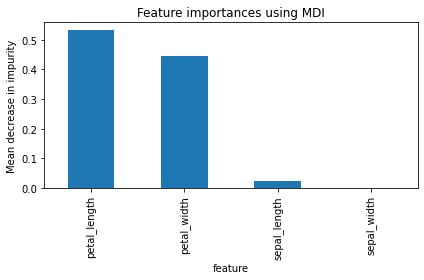

In [43]:
ser = pd.Series(importance.importance)
ser.index = importance.feature

fig, ax = plt.subplots()
ser.plot.bar(yerr=importance, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### How many features are being selected

In [44]:
from sklearn.feature_selection import SelectFromModel

In [45]:
abc = SelectFromModel(tree_clf, prefit=True)
x_upd = abc.transform(X)

In [46]:
np.array(X).shape[1]

4

In [47]:
np.array(x_upd).shape[1]

2

## Prune the tree to maximum depth of #:

In [48]:
clf_pruned = DecisionTreeClassifier(criterion='entropy', 
                                   random_state=50, 
                                   max_depth=3, 
                                   min_samples_leaf=6, 
                                   )

In [49]:
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,
                       random_state=50)

In [50]:
prediction_pruned = clf_pruned.predict(X_test)
prediction_pruned_train = clf_pruned.predict(X_train)

In [51]:
print(accuracy_score(y_test, prediction_pruned))
print(accuracy_score(y_train, prediction_pruned_train))

0.9210526315789473
0.9732142857142857


In [52]:
acc_DT = accuracy_score(y_test, prediction_pruned)

In [53]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'],
                          'accuracy':acc_DT})

## Regularization Hyperparameters

```python
clf = DecisionTreeClassifier(criterion="entropy", # default: "gini"
                             splitter="best", # "random"
                             max_depth=5, 
                             min_samples_split=4, # default=2
                             random_state=0, 
                             max_leaf_nodes=5, 
                            )
```

# Ensemble Algorithms

Ensemble methods are more robust, accurate, and mature algorithms in comparison to their counterparts:

1. enhance capabilities by combining weak predictors
2. improve overall performance

## Random Forest Classifier

```python
sklearn.ensemble.RandomForestClassifier
```

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Create a forest of decision trees trained on different columns (features) of the training data.

From V.V. p. 186:

A `random forest` is an ensemble-based technique where it creates multiple smaller trees using a subset of data.

The final decision is based on the `voting` mechanism by each of the trees.

Decision trees are prone to overfitting. An ensemble-based random forest is a good choice to tackle overfitting.

### Advanced Modeling: Feature transformations with ensembles of trees

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [55]:
rf_model = RandomForestClassifier(n_estimators=50, # The number of trees in the forest
                                  max_depth=5, 
                                  random_state=10, 
                                  criterion='gini', # 'entropy'
                                  bootstrap = True, 
                                  max_features = 'sqrt')

In [56]:
# FIT the training data:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=50,
                       random_state=10)

In [57]:
# make PREDICTions on the testing data:
prediction_RF = rf_model.predict(X_test)

In [58]:
print(confusion_matrix(y_test, prediction_RF))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix')

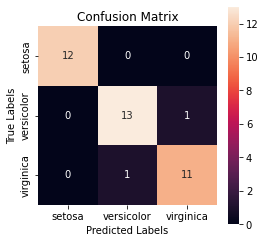

In [59]:
fig_cm_RF, ax_cm_RF = plt.subplots(1, 1, figsize=(4, 4))
cm_RF = confusion_matrix(y_test, prediction_RF)
ax_cm_RF = sns.heatmap(cm_RF, annot=True, square=True,
                       xticklabels=iris.target_names,
                       yticklabels=iris.target_names)
ax_cm_RF.set_xlabel('Predicted Labels')
ax_cm_RF.set_ylabel('True Labels')
ax_cm_RF.set_title('Confusion Matrix')

In [60]:
# compute the ACCURACY:
acc_RF = accuracy_score(y_test, prediction_RF)

In [61]:
resultsRF = pd.DataFrame({'Method':['Random Forest'],
                          'accuracy':acc_RF})
resultsDf = pd.concat([resultsRF])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Random Forest,0.947368


## Mutual Information

A non-negative metric that measures the dependency between the variables.

1. Use `k-nearest-neighbors` to determine the mutual information between features and the target.

2. Mutual information quantifies the amount of information gained by observing another variable.

3. The value is zero or more. If the value is zero there is no relation between them.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

In [62]:
from sklearn import feature_selection

In [63]:
mic = feature_selection.mutual_info_classif(X, y)

<AxesSubplot:ylabel='feature'>

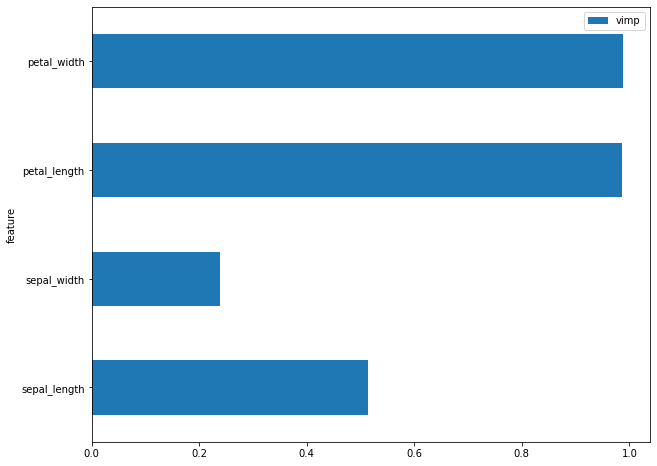

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
(
pd.DataFrame(
    {"feature": X.columns, "vimp": mic}
)
.set_index("feature")
.plot.barh(ax=ax)
)

# Ensemble Algorithms -- Boosting Algorithms

`Refer to Vaibhav Verdhan, chapter 4, pages: 193-208`

1. Boosting is an ensemble method that creates a strong classifier from weak classifiers.

2. A new model is created in a sequence, learning from the misclassifications of the previous model.

## AdaBoost Algorithm

`Adaptive Boosting`: 
1. a base model is created using a subset of the data
2. the base model is used to make predictions on the complete dataset
3. the perfomance of the base model is calculated
4. create the next model assinging higher importance weights on incorrectly predicted points
5. the weigths are proporsional to the error
6. thus the next model has been improved over the previous one
7. if no more reduction in the error is possible, the final model has been reached

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
adaboost_clf = AdaBoostClassifier(n_estimators=50, 
                                 learning_rate=0.05, 
                                 random_state=5
                                 )

In [67]:
# FIT the training data:
adaboost_clf = adaboost_clf.fit(X_train, y_train)

In [68]:
# make PREDICTions on the testing data:
prediction_adaboost = adaboost_clf.predict(X_test)

In [69]:
# compute the ACCURACY:
acc_AB = accuracy_score(y_test, prediction_adaboost)
resultsAB = pd.DataFrame({'Method':['AdaBoost'],
                          'accuracy':acc_AB})
resultsDf = pd.concat([resultsDf, resultsAB])
resultsDf

,Method,accuracy
0,Random Forest,0.947368
0,AdaBoost,0.921053


# Ensemble Algorithms
## Bagging Classifier

`Refer to Vaibhav Verdhan, chapter 4, pages 193-208`

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
bagging_clf = BaggingClassifier(n_estimators=55, 
                               max_samples=0.5, 
                               bootstrap=True, 
                               oob_score=True, 
                               random_state=5, 
                               )

In [72]:
# FIT the training data:
bagging_clf = bagging_clf.fit(X_train, y_train)

In [73]:
# make PREDICTions on the testing data:
prediction_bagging = bagging_clf.predict(X_test)

In [74]:
# compute the ACCURACY:
acc_BG = accuracy_score(y_test, prediction_bagging)
resultsBG = pd.DataFrame({'Method':['Bagging'],
                          'accuracy':acc_BG})
resultsDf = pd.concat([resultsDf, resultsBG])
resultsDf

,Method,accuracy
0,Random Forest,0.947368
0,AdaBoost,0.921053
0,Bagging,0.921053


# Ensemble Algorithms
## Gradient Boosting Classifier

`Refer to Vaibhav Verdhan, chapter 4, pages 193-208`

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gradientBoosting_clf = GradientBoostingClassifier(n_estimators=55, 
                                                  learning_rate=0.05, 
                                                  random_state=5, 
                                                 )

In [77]:
# FIT the training data:
gradientBoosting_clf = gradientBoosting_clf.fit(X_train, y_train)

In [78]:
# make PREDICTions on the testing data:
prediction_GB = gradientBoosting_clf.predict(X_test)

In [79]:
# compute the ACCURACY:
acc_GB = accuracy_score(y_test, prediction_GB)
resultsGB = pd.DataFrame({'Method':['Gradient Boosting'],
                          'accuracy':acc_GB})
resultsDf = pd.concat([resultsDf, resultsGB])
resultsDf

,Method,accuracy
0,Random Forest,0.947368
0,AdaBoost,0.921053
0,Bagging,0.921053
0,Gradient Boosting,0.947368


**What do you conclude? Which one is the best ensemble method?**

It is recommended to test random forest and gradient boosting for real-world problems.

## Theory

1. `Gini impurity`:
$$G_i = 1 - \sum^{n}_{k=1} p_{i,k}^2$$

* $p_{i,k}$ is the ratio of class `k` instances among the training instances in the `ith` node
* Gini impurity is slightly faster to compute

2. `Entropy`:
$$H_i = - \sum^{n}_{k=1, p_{i,k}\ne0} p_{i,k} \log_2{(p_{i,k})}$$

* measures homogeneity of data in a node
* entropy is defined as zero when the data points in the node all belongs to one single class
* it is equal to 1 when 
* node containing data dominated by one class, i.e. entropy is small, is ready to become a decision node
* Most of the time they lead to similar trees.  However, when they differ, `Gini impurity` tends to isolate the most frequent class in its own branch of the tree, while `entropy` tends to produce slightly more balanced trees.

3. `Information gain (IG)`:
$$IG = e_s - \sum_{i=1,2} w_{i} H_i$$

# Evaluating Classifiers

1. Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

2. Plotting the ROC curve:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [81]:
which_model = 'Random Forest'
which_model = 'Bagging'

In [82]:
y_setosa = y==0
#y_setosa

In [83]:
y_versicolor = y==1
#y_versicolor

In [84]:
y_virginica = y==2
y_virginica

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool

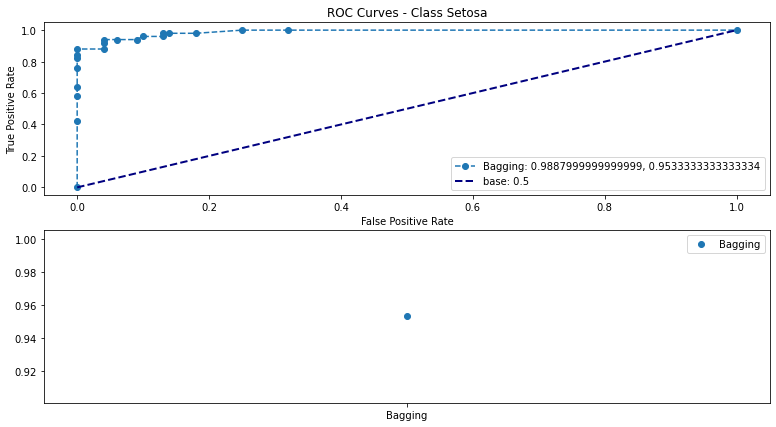

In [85]:
folds = 10
figE, axE = plt.subplots(2, 1, figsize=(13,7))

cv_prob_true = {}
cv_probs = cross_val_predict(bagging_clf, X, y_versicolor, cv=folds, method='predict_proba')
# Note: you can use the 'cv_probs' to create confusion matrices for various models to compare!
cv_prob_true = cv_probs[:,1]

fpr, tpr, thresh = roc_curve(y_versicolor, cv_prob_true)

aucs = roc_auc_score(y_versicolor, cv_prob_true)
cv_scores = cross_val_score(bagging_clf, X, y_versicolor, cv=folds, scoring='accuracy')
cv_mean = cv_scores.mean()

axE[0].plot(fpr, tpr, 'o--', label='{}: {}, {}'.format(which_model, aucs, cv_mean))

axE[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label='{}: {}'.format('base', 0.5))
axE[0].set_title('ROC Curves - Class Setosa')
axE[0].set_xlabel("False Positive Rate")
axE[0].set_ylabel("True Positive Rate")
axE[0].legend()
#axE.set_xlim([0.0, 1.0])
#axE.set_ylim([0.0, 1.05])
axE[1].scatter(which_model, cv_mean, label=which_model)
axE[1].legend()

In [86]:
classifiers = {'Random Forest' : rf_model,
              'Bagging' : bagging_clf,
              '10-NN' : knn_model}

NameError: name 'knn_model' is not defined

In [ ]:
folds = 10
figE, axE = plt.subplots(2, 1, figsize=(13,7))
axE[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label='{}: {}'.format('base', 0.5))

for model_name, model in classifiers.items():
    #cv_prob_true = {}
    cv_probs = cross_val_predict(model, X, y_versicolor, cv=folds, method='predict_proba')
    # Note: you can use the 'cv_probs' to create confusion matrices for various models to compare!
    cv_prob_true = cv_probs[:,1]
    
    # for ROC:
    fpr, tpr, thresh = roc_curve(y_versicolor, cv_prob_true)
    aucs = roc_auc_score(y_versicolor, cv_prob_true)
    
    # for cross-validation accuracy:
    cv_scores = cross_val_score(model, X, y_versicolor, cv=folds, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    # subplot for ROC:
    axE[0].plot(fpr, tpr, 'o--', label='{}: {}, {}'.format(model_name, aucs, cv_mean))
    axE[0].set_title('ROC Curves - Class Setosa')
    axE[0].set_xlabel("False Positive Rate")
    axE[0].set_ylabel("True Positive Rate")
    axE[0].legend()
    #axE.set_xlim([0.0, 1.0])
    #axE.set_ylim([0.0, 1.05])
    
    # subplot for cross-validation accuracy:
    axE[1].scatter(model_name, cv_mean, label=model_name)
    axE[1].legend()

In [ ]:
classifiers = {'Random Forest' : prediction_RF,
              'Bagging' : prediction_bagging}

In [ ]:
folds = 10
figE, axE = plt.subplots(2, 1, figsize=(13,7))

for model_name, model_pred in classifiers.items():
    
    cm_RF = confusion_matrix(y_test, model_pred)
    ax_cm_RF = sns.heatmap(cm_RF, annot=True, square=True,
                           xticklabels=iris.target_names,
                           yticklabels=iris.target_names)
    ax_cm_RF.set_xlabel('Predicted Labels')
    ax_cm_RF.set_ylabel('True Labels')
    ax_cm_RF.set_title('Confusion Matrix')

In [ ]:
cv_probs

### Try with a `k-NN` classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Exercise:

1. Create a plot for the overall accuracy of every model
2. Create a subplots figure displaying the confusion matrices in heatmap for every model
3. Create a ROC curve for all models